# Banner
In this notebook we create the banner shown on the github page.

In [1]:
import bia_bob

In [2]:
%%bob
* Load blobs.tif from disk
* Segment the bright objects on the dark background
* Measure area and perimeter of the objects
* Show the original image, the segmented image and an 
  area versus perimeter plot side-by-side using subfigures.

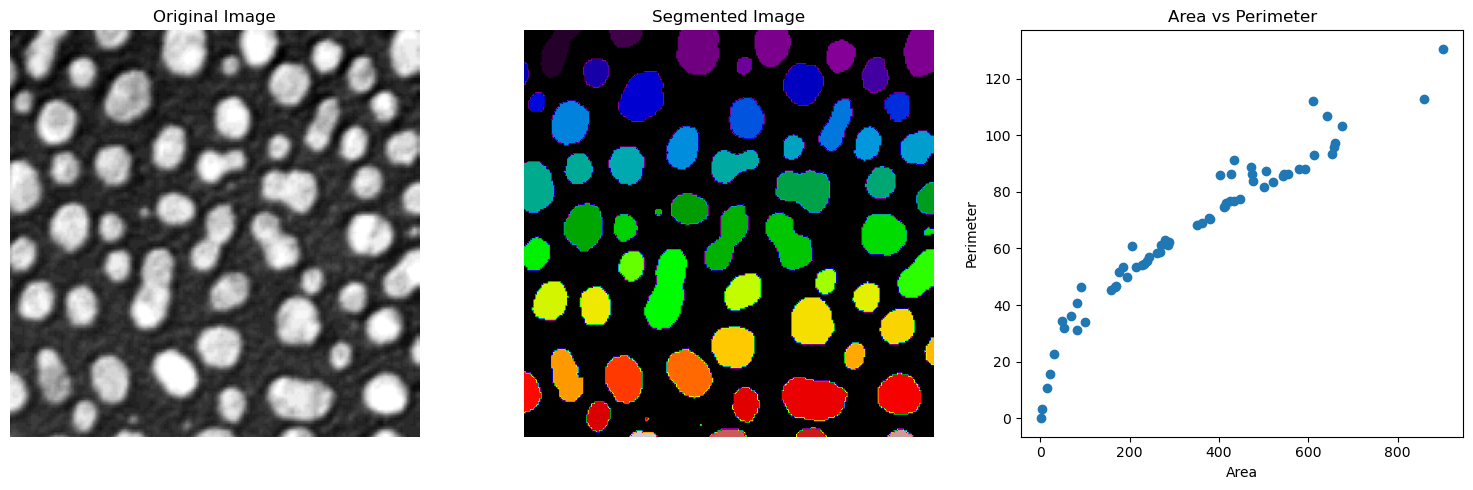

   label   area  perimeter
0      1  433.0  91.254834
1      2  185.0  53.556349
2      3  658.0  95.698485
3      4  434.0  76.870058
4      5  477.0  83.798990


In [3]:
import numpy as np
from skimage import io, filters, measure, segmentation
import matplotlib.pyplot as plt
import pandas as pd
import pyclesperanto_prototype as cle
import stackview

# Load the image
image = io.imread('blobs.tif')

# Segment the bright objects
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the objects
labels = measure.label(binary)

# Measure properties
properties = ['label', 'area', 'perimeter']
df = pd.DataFrame(measure.regionprops_table(labels, properties=properties))

# Create the figure with subfigures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original image
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# Segmented image
ax2.imshow(labels, cmap='nipy_spectral')
ax2.set_title('Segmented Image')
ax2.axis('off')

# Scatter plot
ax3.scatter(df['area'], df['perimeter'])
ax3.set_xlabel('Area')
ax3.set_ylabel('Perimeter')
ax3.set_title('Area vs Perimeter')

plt.tight_layout()
plt.show()

# Display the dataframe
print(df.head())